<a href="https://colab.research.google.com/github/hragu50/courseraiot/blob/main/Mask_Mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train_dir = '/content/drive/MyDrive/face_mask/train'
test_dir = '/content/drive/MyDrive/face_mask/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),class_mode='categorical',batch_size=32)

Found 5258 images belonging to 2 classes.
Found 2267 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))
base_model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [ ]:
base_model.trainable = False

x = base_model.output
y = AveragePooling2D(pool_size=(7, 7))(x)
y = Flatten(name="flatten")(y)
y = Dense(128, activation="relu")(y)
y = Dropout(0.5)(y)
y = Dense(2, activation="softmax")(y)
model = Model(inputs = base_model.input, outputs = y)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
LR = 1e-4
EPOCHS = 20

In [ ]:
opt = Adam(lr=LR, decay=LR / EPOCHS)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])

In [ ]:
history = model.fit(train_generator, validation_data = test_generator, epochs = EPOCHS)

Epoch 1/20
  5/165 [..............................] - ETA: 16:39 - loss: 0.9621 - accuracy: 0.4875

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


165/165 [==============================] - 2075s 13s/step - loss: 0.3346 - accuracy: 0.8855 - val_loss: 0.1110 - val_accuracy: 0.9797
Epoch 2/20
165/165 [==============================] - 124s 751ms/step - loss: 0.1089 - accuracy: 0.9717 - val_loss: 0.0661 - val_accuracy: 0.9815
Epoch 3/20
165/165 [==============================] - 123s 744ms/step - loss: 0.0717 - accuracy: 0.9793 - val_loss: 0.0569 - val_accuracy: 0.9837
Epoch 4/20
165/165 [==============================] - 122s 742ms/step - loss: 0.0618 - accuracy: 0.9819 - val_loss: 0.0466 - val_accuracy: 0.9868
Epoch 5/20
165/165 [==============================] - 121s 734ms/step - loss: 0.0515 - accuracy: 0.9852 - val_loss: 0.0441 - val_accuracy: 0.9854
Epoch 6/20
165/165 [==============================] - 122s 741ms/step - loss: 0.0478 - accuracy: 0.9846 - val_loss: 0.0448 - val_accuracy: 0.9846
Epoch 7/20
165/165 [==============================] - 121s 736ms/step - loss: 0.0433 - accuracy: 0.9884 - val_loss: 0.0417 - val_accurac

In [ ]:
model.evaluate(test_generator)

71/71 [==============================] - 54s 756ms/step - loss: 0.0349 - accuracy: 0.9876


[0.03489634394645691, 0.9876489043235779]

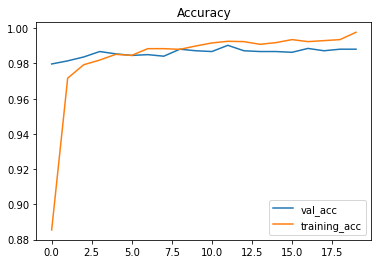

In [ ]:
plt.figure()
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["accuracy"])
plt.legend(["val_acc", "training_acc"])
plt.title("Accuracy")
plt.show()

Text(0.5, 1.0, 'Loss')

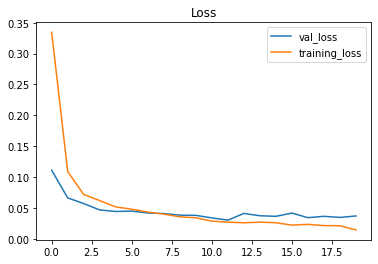

In [ ]:
plt.figure()
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.legend(["val_loss", "training_loss"])
plt.title("Loss")